In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from helpers import *
from implementations import *
print("Importation complete")
DATA_TRAIN_PATH = '../data/train.csv'
DATA_TEST_PATH = '../data/test.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Importation complete


## Load the training data into feature matrix, class labels, and event ids:

In [20]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
print("training data is loaded")

training data is loaded


## Data Analyzing

In [ ]:
# As we can see here, y only takes value -1 or 1:
for value in y:
    assert(value==1 or value==-1)
print("All value in y is equal either to 1 or -1.")


This means that y is a binary variable. So should we modify y's domain to {0, 1} instead of {-1, 1} if we want the logistic regression methods to work?
Note that at first sight, logistic regression seems to be the best solution to fit the data since this method was designed for binary classification.
- We implemented two methods minus_one_to_zero() and zero_to_minus_one() in the helper methods section that translate y from one domain to the other.

## Data Cleaning
We have to handle:
- outliers:
A value is considered as an outlier if it does not fit in a range defined from quartiles. Outliers are replaced by the mean value of the observations.
- unasssigned values (-999, 999):
We proceed the same way
- We also standardize the data using the given standardize method. Note that this adds a row of ones in front of the data tX, whose dimension change as we can see:


In [21]:
tX = data_cleaning(tX)

shape of tX before standardizing: (250000, 30)
shape of tX before standardizing: (250000, 31)
data cleaning completed


### Using PCA to get rid of features that don't give enough information

After running some tests we figured out that PCA actually worsens our results. This seems legit since it discards some features. Note that it can still be useful for methods that can't handle calculus if the matrices are too big (ex: logistic regression with polynomial basis).

In [ ]:
#tX = PCA(tX)

In [ ]:
tX_subset = tX_tr[0:20000]
y_subset = y_tr[0:20000]
w_initial = np.zeros(tX_subset.shape[1])
w, loss = reg_logistic_regression(y_subset,tX_subset, 0, w_initial, 50, 1e-2)
print("data fitting:",error(y_te,predict_labels(w,tX_te)),"%")

## Use Polynomial Regression to find the optimal degree for least squares method

computing fitting for degree 1 ...
computing fitting for degree 2 ...
computing fitting for degree 3 ...
computing fitting for degree 4 ...
computing fitting for degree 5 ...
computing fitting for degree 6 ...
computing fitting for degree 7 ...
computing fitting for degree 8 ...
computing fitting for degree 9 ...
computing fitting for degree 10 ...
computing fitting for degree 11 ...
best fitting with degree 3 : 81.024


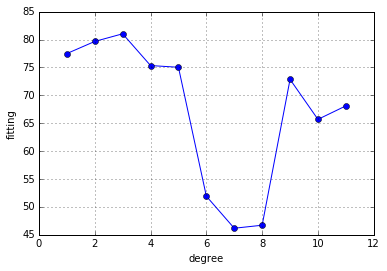

In [17]:
x_tr, y_tr, x_te, y_te = split_data(tX, y, 4/5)
degrees = range(1, 12)
polynomial_regression(x_tr, y_tr, x_te, y_te, degrees)

### Results
Looking at the results, it seems like 3 is the optimal degree. However: 
- we might want to add a regularization step. This would among others let us avoid overfitting. => Ridge Regression
- The result might be biased because we split the data only in two subsets training/testing Thus we'll use the Ridge regression, which uses a regularizer that depends on a parameter lambda. => k-fold Cross Validation

## Use Ridge Regression to determine optimal lambda
This is a demo where we use ridge regression to deduce the precesion of our prediction data for each (degree, lambda) pair. We iterate over different degree/lambda values to find the best ones. Recall that lambda is a coefficient penalizing the size of regression coefficients. Ridge regression introduces bias but reduces the variance of the estimate.

fitting for degree 7 and lambda 1e-12 : 78.482
fitting for degree 7 and lambda 5.17947467923e-12 : 81.274
fitting for degree 7 and lambda 2.68269579528e-11 : 81.326
fitting for degree 7 and lambda 1.38949549437e-10 : 81.318
fitting for degree 7 and lambda 7.19685673001e-10 : 81.33
fitting for degree 7 and lambda 3.72759372031e-09 : 81.324
fitting for degree 7 and lambda 1.93069772888e-08 : 81.324
fitting for degree 7 and lambda 1e-07 : 81.322
fitting for degree 7 and lambda 5.17947467923e-07 : 81.326
fitting for degree 7 and lambda 2.68269579528e-06 : 81.33200000000001
fitting for degree 7 and lambda 1.38949549437e-05 : 81.33200000000001
fitting for degree 7 and lambda 7.19685673001e-05 : 81.344
fitting for degree 7 and lambda 0.000372759372031 : 81.31200000000001
fitting for degree 7 and lambda 0.00193069772888 : 81.34599999999999
fitting for degree 7 and lambda 0.01 : 81.216
max fitting for lambda = 0.00193069772888 degree= 7 -> 81.34599999999999


TypeError: 'NoneType' object is not iterable

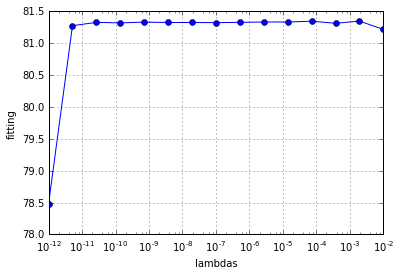

In [34]:
seed = 1
split_ratio = 0.8
lambdas = np.logspace(-12, -2, 15)
degrees = [7]
ridge_regression_demo(tX, y, split_ratio, seed, lambdas, degrees)

After running a few tests with ridge regression, it seems like we should not go above degree 10.

# Use Cross-Validation to find best degree and lambda values

Here is a demo of the cross-validation function. We basically run cross-validation for different lamdda/degree combinations to determine which one gives the smallest error, exactly as we did above with ridge_regression_demo.
The difference is that above it was a simple 2-fold split of the data, but now we do a k-fold (here k=4) which gives us a less biased error.
<br>
The idea is to first run this demo with a large number of degree and a large domain for lambda but few lambdas to save computation time. This gives us a good idea of the values we're looking for
<br>
After that we can refine the search, take only one or two degrees, a smaller domain for lambda but more lambdas in it.

In [ ]:
degrees = [7]
k_fold = 4
#lambdas = np.logspace(-12, -9, 6)
lambdas = np.logspace(-12, -2, 50)
cross_validation_demo(tX, y, k_fold, degrees, lambdas, ridge_regression)

The result of this experiment is that the best combinaison we obtain is a fitting of 81.4376 for degree 7 and lambda = 6.5512855686e-12

## Computing the weights with different methods

### Reloading and splitting the data

In [ ]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX = data_cleaning(tX)
tX_tr, y_tr, tX_te, y_te = split_data(tX, y, 3/4)

### Least Squares

In [ ]:
w, loss = least_squares(y_tr, tX_tr)
print("Data fitting:",error(y_te,predict_labels(w,tX_te)),"%")
#print("AMS:",compute_AMS(w, y_te, tX_te))

### Least Squares with polynomial basis

In [ ]:
poly_basis_tr = build_poly(tX_tr, 2)
poly_basis_te = build_poly(tX_te, 2)
w, loss = least_squares(y_tr, poly_basis_tr)
# build a polynomial basis of the same size as training set for the testing set
print("data fitting:",error(y_te,predict_labels(w,poly_basis_te)),"%")
#print("AMS:",compute_AMS(w, y_te, poly_basis_te))

### Least Squares - Gradient Descent

In [ ]:
gamma = 1e-7
initial_w = 0*np.ones(len(tX[0])) #try changing initial w
max_iters = 20
w, loss = least_squares_GD(y_tr, tX_tr, initial_w, max_iters, gamma)
print("data fitting",error(y_te,predict_labels(w,tX_te)),"%")
#print("AMS:",compute_AMS(w, y_te, tX_te))

### Least Squares - Stochastic Gradient Descent

In [ ]:
gamma = 1e-7
initial_w = 0*np.ones(len(tX[0])) #try changing initial w
max_iters = 10
w, loss = least_squares_SGD(y_tr, tX_tr, initial_w, max_iters, gamma)
print("data fitting",error(y_te,predict_labels(w,tX_te)),"%")
#print("AMS:",compute_AMS(w, y_te, tX_te))

### Ridge Regression with polynomial basis

In [ ]:
# to find optimal degree and lambda, check "Use RR to determine optimal
# lambda and degree" section
degree = 5
poly_basis_tr = build_poly(tX_tr, degree)
lambda_ = 1e-11
poly_basis_te = build_poly(tX_te, degree)
w, loss = ridge_regression(y_tr, poly_basis_tr, lambda_)
print("data fitting:",error(y_te,predict_labels(w,poly_basis_te)),"%")
#print("AMS:",compute_AMS(w, y_te, poly_basis_te))

### Logistic Regression

In [ ]:
max_iter = 50
gamma = 1e-2
y01 = minus_one_to_zero(y_tr)

w_initial = np.zeros(tX_tr.shape[1])
w,loss = logistic_regression(y01, tX_tr, w_initial, max_iter, gamma)
print("data fitting:",error(y_te,predict_labels(w,tX_te)),"%")
#print("AMS:",compute_AMS(w, y_te, tX_te))

### Logistic Regression with polynomial basis

In [ ]:
max_iter = 100
gamma = 1e-7
y01 = minus_one_to_zero(y_tr)

best_fitting = 0
y_red = y01[0:1000]
x_red = tX_tr[0:1000]
degrees = [1, 2, 3, 4, 5]
best_degree = degrees[0]
for degree in degrees:
    poly_basis_tr = build_poly(x_red, degree)
    initial_w = np.zeros(poly_basis_tr.shape[1])
    w,loss = logistic_regression(y_red, poly_basis_tr, initial_w, max_iter, gamma)
    poly_basis_te = build_poly(tX_te, degree)
    fitting = error(y_te,predict_labels(w,poly_basis_te))
    print("degree",degree,"-> fitting:",fitting)
    if(best_fitting < fitting):
        best_fitting = fitting
        best_degree = degree
print("best fitting:",best_fitting,"obtained with degree",best_degree)

### Regularized Logistic Regression

In [ ]:
tX_subset = tX_tr[0:20000]
y_subset = y_tr[0:20000]
w_initial = np.zeros(tX_subset.shape[1])
w, loss = reg_logistic_regression(y_subset,tX_subset, 0, w_initial, 50, 1e-2)
print("data fitting:",error(y_te,predict_labels(w,tX_te)),"%")

### Logistic Regression using Newton's method

In [ ]:
max_iter = 100
gamma = 1e-4
y01 = minus_one_to_zero(y_tr)

y_red = y01[0:15000]
x_red = tX_tr[0:15000]
initial_w = np.zeros(x_red.shape[1])

w,loss = newton_logistic_regression(y_red, x_red, max_iter, gamma, initial_w)
print("data fitting:",error(y_te,predict_labels(w,tX_te)),"%")
#print("AMS:",compute_AMS(w, y_te, tX_te))

## Generate predictions and save ouput in csv format for submission:

In [ ]:
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print("testing data is loaded")
tX_test = data_cleaning(tX_test)
#tX_test = PCA(tX_test)

In [ ]:
y, tX, ids = load_data()
tX = data_cleaning(tX)
#tX = PCA(tX)

In [ ]:
# test ridge regression with poly basis of degree 5
lambda_ = 1e-11
degree = 5
#tX_test,_,_ = standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = ridge_regression(y, poly_basis_tr, lambda_)
print("done")

In [ ]:
# test ridge regression with poly basis of degree 7
# This is the optimal solution with cleaning and no PCA
lambda_ = 6.5512855686e-12
degree = 7
#tX_test,_,_ = standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = ridge_regression(y, poly_basis_tr, lambda_)
print("done")

In [ ]:
# test least squares
degree = 2
tX_test,_,_=standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = least_squares(y, poly_basis_tr)

In [ ]:
# test ridge regression with poly_basis of degree 2
lambda_ = 0.00138949549437
degree = 2
tX_test,_,_ = standardize(tX_test)
poly_basis_te = build_poly(tX_test, degree)
poly_basis_tr = build_poly(tX, degree)
w, loss = ridge_regression(y, poly_basis_tr, lambda_)
print("done")

In [ ]:
# test ridge regression no data cleaning
lambda_ = 0.000268269579528 
w, loss = ridge_regression(y, tX, lambda_)
#print(error(y_te,predict_labels(w,tX_te_poly)))

In [ ]:
print(w.shape)
print(tX_test.shape)

In [ ]:
OUTPUT_PATH = '../data/submissionData/RR_deg7.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, poly_basis_te)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)
print("done")

In [ ]:
print(y_pred.shape)
print(tX_test.shape)